## Corona Data Scrapping & visualization for India

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.

Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.  Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

The best way to prevent and slow down transmission is be well informed about the COVID-19 virus, the disease it causes and how it spreads. Protect yourself and others from infection by washing your hands or using an alcohol based rub frequently and not touching your face.  

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import geopandas as gpd
from prettytable import PrettyTable

## Let's Scap the Data

In [2]:
url = 'https://www.mohfw.gov.in/'# make a GET request to fetch the raw HTML content
web_content = requests.get(url).content# parse the html content
soup = BeautifulSoup(web_content, "html.parser")# remove any newlines and extra spaces from left and right
extract_contents = lambda row: [x.text.replace('\n', '') for x in row]# find all table rows and data cells within
stats = [] 
all_rows = soup.find_all('tr')
for row in all_rows:
    stat = extract_contents(row.find_all('td')) # notice that the data that we require is now a list of length 5
    if len(stat) == 5:
        stats.append(stat)#now convert the data into a pandas dataframe for further processingnew_cols = ["Sr.No", "States/UT","Confirmed","Recovered","Deceased"]

new_cols = ["Sr.No", "States/UT","Confirmed","Recovered","Deceased"]
state_data = pd.DataFrame(data = stats, columns = new_cols)
state_data.head()

#03-05-2020

,Sr.No,States/UT,Confirmed,Recovered,Deceased
0,1,Andaman and Nicobar Islands,33,33,0
1,2,Andhra Pradesh,1930,887,44
2,3,Arunachal Pradesh,1,1,0
3,4,Assam,63,34,2
4,5,Bihar,591,322,5


In [3]:
state_data.shape

(33, 5)

## scraped data columns are actually of ‘string’ datatype. We need to convert them into ‘int’ datatype.

In [4]:
state_data['Confirmed'] = state_data['Confirmed'].map(int)
state_data['Recovered'] = state_data['Recovered'].map(int)
state_data['Deceased'] = state_data['Deceased'].map(int)

## Now we will use PrettyTable

In [5]:
table = PrettyTable()
table.field_names = (new_cols)
for i in stats:
    table.add_row(i)
table.add_row(["","Total", 
               sum(state_data['Confirmed']), 
               sum(state_data['Recovered']), 
               sum(state_data['Deceased'])])
print(table)

+-------+-----------------------------+-----------+-----------+----------+
| Sr.No |          States/UT          | Confirmed | Recovered | Deceased |
+-------+-----------------------------+-----------+-----------+----------+
|   1   | Andaman and Nicobar Islands |     33    |     33    |    0     |
|   2   |        Andhra Pradesh       |    1930   |    887    |    44    |
|   3   |      Arunachal Pradesh      |     1     |     1     |    0     |
|   4   |            Assam            |     63    |     34    |    2     |
|   5   |            Bihar            |    591    |    322    |    5     |
|   6   |          Chandigarh         |    169    |     24    |    2     |
|   7   |         Chhattisgarh        |     59    |     43    |    0     |
|   8   |      Dadar Nagar Haveli     |     1     |     0     |    0     |
|   9   |            Delhi            |    6542   |    2020   |    73    |
|   10  |             Goa             |     7     |     7     |    0     |
|   11  |           Gujar

## Let' start Visualization

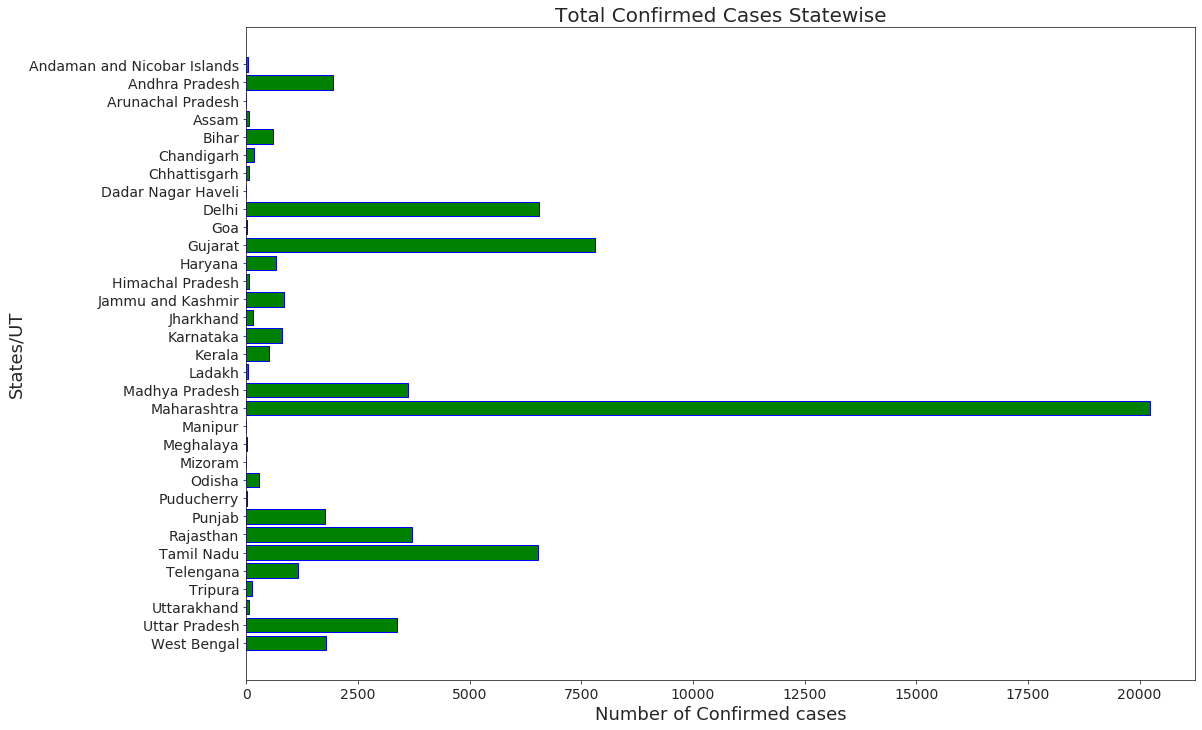

In [6]:
sns.set_style("ticks")
# plt.rcParams['axes.facecolor'] = 'black'
plt.figure(figsize = (17,12))
plt.barh(state_data["States/UT"], state_data["Confirmed"].map(int),
         align = 'center', color = 'green', edgecolor = 'blue')
plt.xlabel('Number of Confirmed cases', fontsize = 18)
plt.ylabel('States/UT', fontsize = 18)
plt.gca().invert_yaxis() #to maintain the order

plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14)
plt.title('Total Confirmed Cases Statewise', fontsize = 20)
plt.show() 

## Donut chart for analysis of all India Cases

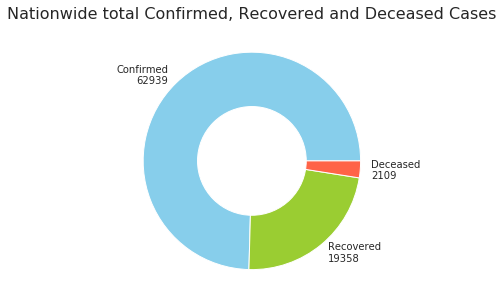

In [7]:
# donut chart representing nationwide total confirmed, cured and deceased cases
group_size = [sum(state_data['Confirmed']), 
              sum(state_data['Recovered']), 
              sum(state_data['Deceased'])]

group_labels = ['Confirmed\n' + str(sum(state_data['Confirmed'])), 
                'Recovered\n' + str(sum(state_data['Recovered'])), 
                'Deceased\n'  + str(sum(state_data['Deceased']))]
custom_colors = ['skyblue','yellowgreen','tomato']

plt.figure(figsize = (5,5))
plt.pie(group_size, labels = group_labels, colors = custom_colors)
central_circle = plt.Circle((0,0), 0.5, color = 'white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size = 12) 
plt.title('Nationwide total Confirmed, Recovered and Deceased Cases', fontsize = 16)
plt.show()

## Let's plot Pie chart with Plotly to see a Confirmed cases ratio

After seen analysis, we can say that recovered ratio is more than death ratio. So it is good point for us

In [8]:
import plotly.express as px
fig = px.pie(state_data, values = 'Confirmed',names='States/UT', height=600)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))

fig.show()

We can see Maharashtra have many number of cases

## Let's see for Recovered cases ratio

In [9]:
fig = px.pie(state_data, values = 'Deceased',names='States/UT', height=600)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))

fig.show()

## Let's see TreeMap for Confirmed Cases

In [10]:
fig = px.treemap(state_data, path=['States/UT'], values='Confirmed', height=600, width=800)

fig.update_layout(
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))

fig.show()

## Let's see for recovered cases

In [11]:
fig = px.treemap(state_data, path=['States/UT'], values='Recovered', height=600, width=800)

fig.update_layout(
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))

fig.show()

## Let's see for Deceased class

In [12]:
fig = px.treemap(state_data, path=['States/UT'], values='Deceased', height=600, width=800)
fig.update_layout(
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))

fig.show()

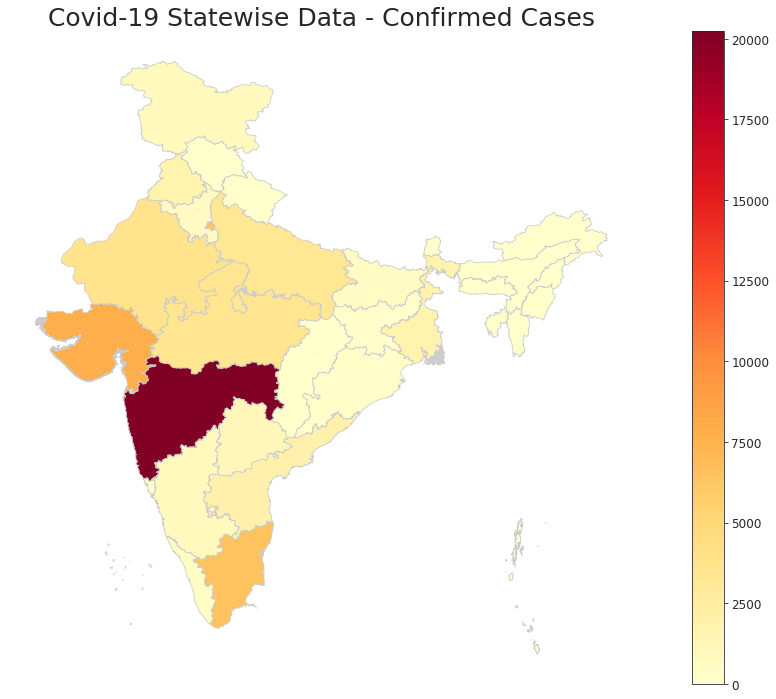

<Figure size 432x288 with 0 Axes>

In [13]:
import geopandas as gpd
import pandas as pd
# read the state wise shapefile of India in a GeoDataFrame and preview it
map_data = gpd.read_file('/kaggle/input/india-states/Igismap/Indian_States.shp')
map_data.rename(columns = {'st_nm':'States/UT'}, inplace = True)
map_data.head()

# correct the name of states in the map dataframe 
map_data['States/UT'] = map_data['States/UT'].str.replace('&', 'and')
map_data['States/UT'].replace('Arunanchal Pradesh', 'Arunachal Pradesh', inplace = True)
map_data['States/UT'].replace('Telangana', 'Telengana', inplace = True)
map_data['States/UT'].replace('NCT of Delhi', 'Delhi', inplace = True)

# merge both the dataframes - state_data and map_data
merged_data = pd.merge(map_data, state_data, how = 'left', on = 'States/UT')
merged_data.fillna(0, inplace = True)
merged_data.drop('Sr.No', axis = 1, inplace = True)

# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Covid-19 Statewise Data - Confirmed Cases', fontdict = {'fontsize': '25', 'fontweight' : '3'})
# plot the figure
merged_data.plot(column = 'Confirmed', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
plt.show()
plt.savefig('in.png')

#### Reference:- https://towardsdatascience.com/tracking-corona-covid-19-spread-in-india-using-python-40ef8ffa7e31